# Most of this code should be pulled into seperate .py files

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import TruncatedSVD
import warnings; warnings.filterwarnings("ignore", 
                                         category = RuntimeWarning)

In [2]:
# Training matrix
user_item = pd.read_csv('/home/grimoire/Projects/BeerRatings/user_item_matrix.csv')

X = user_item.values.T

In [3]:
# Test matrix
test_matrix = pd.read_csv('/home/grimoire/Projects/BeerRatings/test_matrix.csv', 
                          index_col='review_profilename')

test_matrix = test_matrix.T

In [4]:
def recommendations(beer, user_item=user_item) :
    
    
    #############################################################
    # The coeffecient matrix is an 2D array of arrays
    # There is no indication of what columns refer to what beer
    # We will pull this information from our user_item matrix
    # Create a list of the beers from the columns
    # The index of the list will correspond with the coefficient matrix
    #############################################################
    
    # https://stackoverflow.com/questions/944592/best-practice-for-python-assert
    # Self note: build an exception class for beer parameter
    
    beer_names = user_item.columns
    assert beer in beer_names, 'The beer isn\'t currently in the recommendation list,\
    rate it more and it will be soon!' # This derives from user input not matching beer_names, add to exception class
    
    beer_name_list = list(user_item.columns) # Contains the index/name of the beer
    beer_index = beer_name_list.index(beer) # Finds the index of the beer parameter
    beer_list = (pd.DataFrame({'corrcoef_score':corr[beer_index]})
                   .sort_values(by='corrcoef_score', 
                                ascending=False)[1:8]
                   .index
                )
    return list(beer_names[beer_list])

In [5]:
recommendation_precision = []
for x in range(1,100,5) :

    svd = TruncatedSVD(n_components=x, random_state=3)
    matrix = svd.fit_transform(X)
    corr = np.corrcoef(matrix)
    
    precision = 0
    for name in test_matrix.columns : # name will be a column (profile name) from matrix
        user_list = list(test_matrix[test_matrix[name] > 0].index) # List of beers that the user drank
        benchmark = 0 # instantiating if any beers were drank from list of recommended
        for beer in user_list :
            recommended_beers = set(recommendations(beer))
            if recommended_beers & set(user_list) :
                benchmark += 1
        precision += benchmark / len(user_list)
    recommendation_precision.append(precision / len(test_matrix.columns))

In [6]:
[recommendations for recommendations in recommendation_precision]

[0.0027366713967159942,
 0.09770110970042445,
 0.1517946916241592,
 0.17054241497571007,
 0.1802611009452315,
 0.1858572709029688,
 0.19039406011419294,
 0.193070675507072,
 0.19549777793641673,
 0.19734609890684066,
 0.20041108120432422,
 0.20057121232599248,
 0.2023588273414344,
 0.20373739721070672,
 0.20470114641653064,
 0.20602103431614005,
 0.20753708876774898,
 0.207102459013957,
 0.20921430546869163,
 0.21000866594415685]

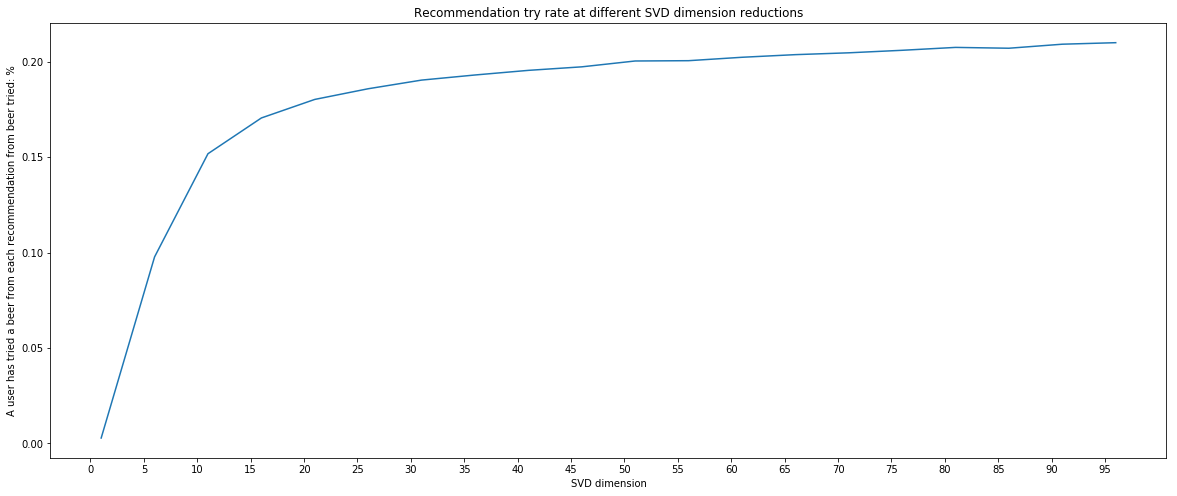

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[20,8])
plt.plot([x for x in range(1,100,5)], 
         recommendation_precision)

plt.title('Recommendation try rate at different SVD dimension reductions')
plt.ylabel('A user has tried a beer from each recommendation from beer tried: %')
plt.xlabel('SVD dimension')
plt.xticks(range(0,100,5))